In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


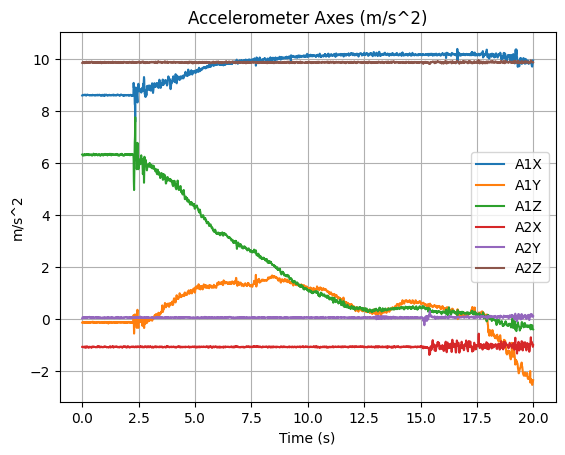

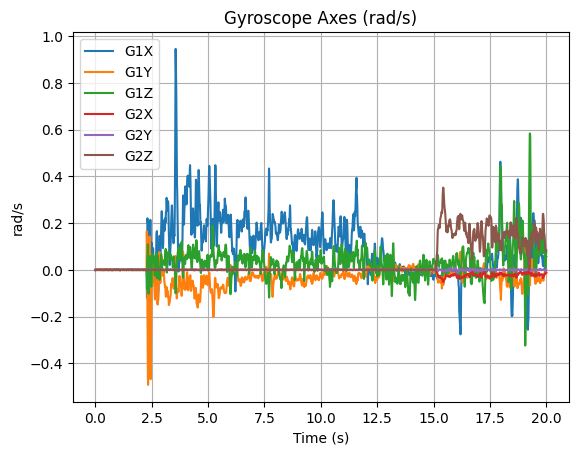

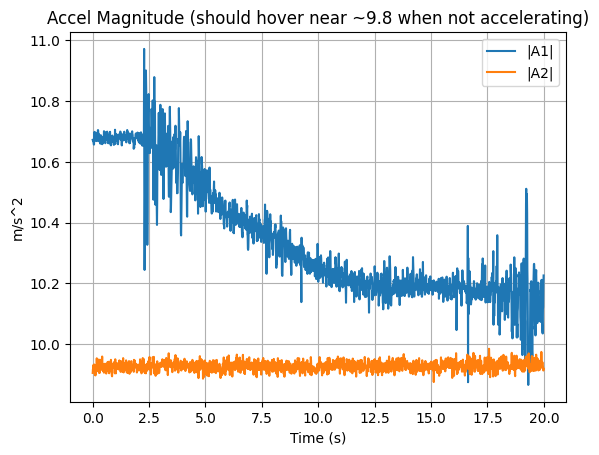

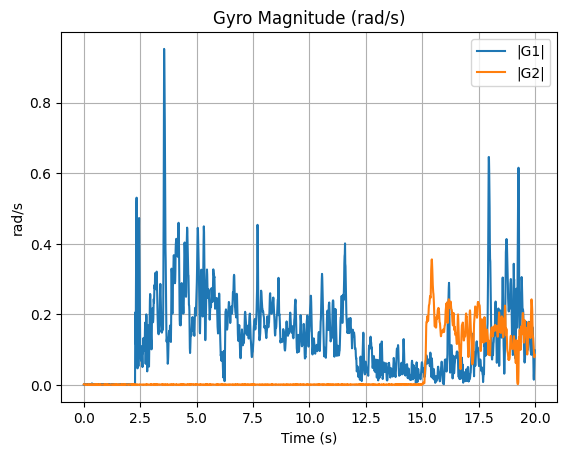

In [3]:

CSV_PATH = "dual_mpu_capture.csv"


def main():
    df = pd.read_csv(CSV_PATH)

    # Convert to numeric (safe)
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df = df.dropna()

    # Time axis in seconds (relative)
    t = (df["T_US"] - df["T_US"].iloc[0]) / 1e6

    # Accel magnitude (m/s^2)
    a1_mag = np.sqrt(df["A1X"] ** 2 + df["A1Y"] ** 2 + df["A1Z"] ** 2)
    a2_mag = np.sqrt(df["A2X"] ** 2 + df["A2Y"] ** 2 + df["A2Z"] ** 2)

    # Gyro magnitude (rad/s)
    g1_mag = np.sqrt(df["G1X"] ** 2 + df["G1Y"] ** 2 + df["G1Z"] ** 2)
    g2_mag = np.sqrt(df["G2X"] ** 2 + df["G2Y"] ** 2 + df["G2Z"] ** 2)

    # ---- Plot 1: Accel axes ----
    plt.figure()
    plt.plot(t, df["A1X"], label="A1X")
    plt.plot(t, df["A1Y"], label="A1Y")
    plt.plot(t, df["A1Z"], label="A1Z")
    plt.plot(t, df["A2X"], label="A2X")
    plt.plot(t, df["A2Y"], label="A2Y")
    plt.plot(t, df["A2Z"], label="A2Z")
    plt.title("Accelerometer Axes (m/s^2)")
    plt.xlabel("Time (s)")
    plt.ylabel("m/s^2")
    plt.legend()
    plt.grid(True)

    # ---- Plot 2: Gyro axes ----
    plt.figure()
    plt.plot(t, df["G1X"], label="G1X")
    plt.plot(t, df["G1Y"], label="G1Y")
    plt.plot(t, df["G1Z"], label="G1Z")
    plt.plot(t, df["G2X"], label="G2X")
    plt.plot(t, df["G2Y"], label="G2Y")
    plt.plot(t, df["G2Z"], label="G2Z")
    plt.title("Gyroscope Axes (rad/s)")
    plt.xlabel("Time (s)")
    plt.ylabel("rad/s")
    plt.legend()
    plt.grid(True)

    # ---- Plot 3: Magnitudes (sanity) ----
    plt.figure()
    plt.plot(t, a1_mag, label="|A1|")
    plt.plot(t, a2_mag, label="|A2|")
    plt.title("Accel Magnitude (should hover near ~9.8 when not accelerating)")
    plt.xlabel("Time (s)")
    plt.ylabel("m/s^2")
    plt.legend()
    plt.grid(True)

    plt.figure()
    plt.plot(t, g1_mag, label="|G1|")
    plt.plot(t, g2_mag, label="|G2|")
    plt.title("Gyro Magnitude (rad/s)")
    plt.xlabel("Time (s)")
    plt.ylabel("rad/s")
    plt.legend()
    plt.grid(True)

    plt.show()


if __name__ == "__main__":
    main()
